# Heart Disease Prediction

In this notebook we will performed a simple analysing the Heart Disease UCI dataset, building different models using the sklearn API, train and selecting the best model and save this one into a .pkl file ready for deployment.

0. [Libraries Needed](#0.-Libraries-Needed)
1. [Data Loading and Analysis](#1.-Data-Loading-and-Analysis)
2. [Development and Comparison of Machine Learning Models](#2.-Development-and-Comparrison-of-Machine-Learning-Models)
3. [Saving Model for Deployment](#3.-Saving-Model-for-Deployment)

## 0. Libraries Needed

In [2]:
# basic libraries
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
# ML library
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import classification_report
import sklearn as skl
# Importing Models
from sklearn import tree
from sklearn import svm
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

plt.rcParams['figure.figsize'] = [15, 6]

The next is a function used to add annotations to our bar plots

In [3]:
# Add annotations to a bar plot
def add_annotations(rects, dp):
    # Loop to place label to each bar
    for i, rect in enumerate(rects):
        # Get X and Y placement of label from rect.
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        # Space points between bars
        space = 5
        # Vertical alignment for positive values
        ha = 'left'
        # If value of bar is negative: Place label left of bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label at right
            ha = 'right'
        # Use X value as label and format number with one decimal place
        label = str(x_value)
        # Create text inside the bar
        plt.text(x_value/3, y_value,'%.2f%%' %dp[i], fontsize=22,color='white')
        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha)                      # Horizontally align label differently for

## 1. Data Loading and Analysis

In [4]:
dataset = pd.read_csv('heart.csv')

First, lets check for corropted values in our dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Then let's check some basic statistics with the `describe()` method

In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Class Distribution

After loading the dataset we can explore for example the class distribution so we can take into account the modal class.

In [7]:
# class balance
cb = dataset['target'].value_counts()
print(f'{cb[1]} positives samples and {cb[0]} negatives samples')

165 positives samples and 138 negatives samples


It is even better to visualize it in a Pie chart. From the figure below we can observe that 54.5% of the samples are positives and 45.5% are negative. Therefore, we can assume that we have an almost balanced dataset.

Text(0.5, 1.0, 'Class Distribution')

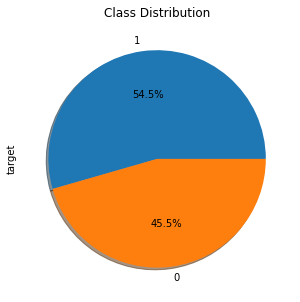

In [8]:
plot1 = dataset['target'].value_counts().plot(kind='pie', shadow = True,figsize=(5,5), autopct='%1.1f%%')
plt.title('Class Distribution')

#### Correlation measurement

Another analysis could be the correlation measurement of the different features with the target. For this operation we can simply use the `.corr()` object of the Pandas dataframe as follow:

In [9]:
dataset[dataset.columns[:]].corr()['target'][:].sort_values(ascending=False)[1:]

cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

From this correlation operation we can observe that the features **cp, thelach and slope** had the greatest positive correlation and **exang, oldpeak, ca and thal** the greatest negative correlation. Furthermore, the features **fbs and chol** have the lowest correlation values. We can also visualize this information in a bar chart as shown below:

Text(0, 0.5, 'Correlation value')

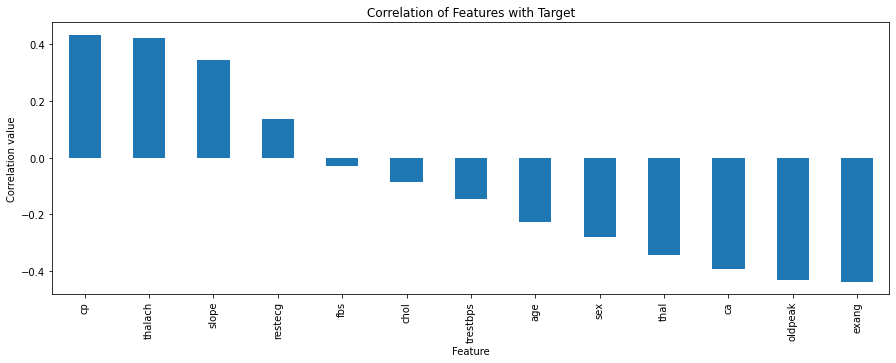

In [10]:
plot2 = dataset[dataset.columns[:]].corr()['target'][:].sort_values(ascending=False)[1:].plot(kind='bar', figsize=(15, 5))
plt.title('Correlation of Features with Target')
plt.xlabel('Feature')
plt.ylabel('Correlation value')

#### Data Preparation

For preparing the dataset I simply split the samples into the classic 70-30% training and testing as follow:

In [11]:
# separating input and output
x_in, y_out = dataset.iloc[:,:-1], dataset.iloc[:,-1]
# separating training and validation
x_train, x_val, y_train, y_val = train_test_split(x_in, y_out, test_size=0.30, random_state=50)
print('Input dimension = ', x_train.shape, '\nNo. examples for validation = ', len(y_val))

Input dimension =  (212, 13) 
No. examples for validation =  91


Next, a nested cross validation will be performed. This process is easily achieved with 2 special functions from the libraries `sklearn`. The first [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), perform 'the inner cross validation' process where the model gets tuned by estimating the best combination of a hypermparameter from a specify grid. The second function [cross_val_scores](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) help us implement the outer process to estimate the performance of the selected parameters, n numbers of times.

In [12]:
# Variable to store the results of all models
summary_model_performance = dict()
# Inner and Outer configuration
inner_cv_parameters = KFold(n_splits=5)
outer_cv_parameters = KFold(n_splits=3)
# Evaluation Metric
evaluation_metric = 'f1'

## 2. Development and Comparison of Machine Learning Models

### Decision Tree Classifier

It is a non-parametric supervise learning method that learns simple decision rules from the data. This basic decisions are broken into simple ones e.g. if-else-then.

This model was implemented using the function [tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) from `sklearn`. Also, a grid was created to explore different hyperparameters such as:

* Criteria: The “gini” for the Gini impurity and the “entropy” for the information gain.
* Maximum depth: The maximum depth of the tree

In [13]:
# Parameters establishment
DT_parameters = {'criterion': ['gini', 'entropy'],
           'max_depth': [5, 10, 15, 20]}

# Initializing Model
DT_model = tree.DecisionTreeClassifier()

# # Inner Block
# DT_cv_inner_block = GridSearchCV(estimator=DT_model, param_grid=DT_parameters,
#     cv=inner_cv_parameters, scoring= evaluation_metric)

# # Outer Block
# DT_cv_outer_block = cross_val_score(DT_cv_inner_block,
#     x_in, y_out, cv=outer_cv_parameters, scoring=evaluation_metric)

# # Model score in outer block
# print('Decision Tree Outer Average f1 score: %.4f, standard deviation of %0.2f'
#       %(DT_cv_outer_block.mean(), DT_cv_outer_block.std()))

#### DT Confusion Matrix
In order to check the results of the model not just in terms of the f1 score, the confusion matrix was also performed:

In [15]:
# Estimating best hyperparameter through gridsearch, using all the data available
DT_best = GridSearchCV(estimator=DT_model, param_grid=DT_parameters, cv=inner_cv_parameters)
# DT_best.fit(x_in, y_out)

# Creating model with best parameters and training with train data
DT_final = tree.DecisionTreeClassifier(**DT_best.best_params_)
DT_final.fit(x_train, y_train)

# Finding and storing model performance & confusion matrix results
tn, fp, fn, tp = skl.metrics.confusion_matrix(y_val, DT_final.predict(x_val)).ravel()
summary_model_performance['DT'] = {'tcorrect': tn+tp, 'fpositives': fp, 'fnegatives': fn}

# Getting confusion matrix on validation data
skl.metrics.plot_confusion_matrix(DT_final, x_val, y_val)
print('DT best parameter: %s, best score: %.2f%% '%(DT_best.best_params_, 100*DT_best.best_score_))

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

As showing in the figure above, with this model the number of positives and negatives correctly identify were 26 from 39. The number of false negatives and false positives are is 13 and 13 respectively.

### Support Vector Machine Classifier

This is a supervised learning model suitable for high dimensional spaces. This makes it a perfect candidate given the number of features that we have (15). These gets represented in a multi-dimensional space where samples are separated by the maximum possible distance.

This model can be implemented using [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from `sklearn`. Also, a grid was created to explore different hyperparameters such as:

* C: The strength of the regularization parameter
* Gamma: Kernel coefficient for the functions ‘rbf’, ‘poly’ and ‘sigmoid’
* Kernel functions : Used to try different decision functions

In [25]:
# Parameters establishment
SVM_parameters = {'C': [1e-5, 1, 1e5],
            'gamma': [1e-1, 1, 1e1],
            'kernel': ['linear', 'rbf']}

# Initializing Model
SVM_model = svm.SVC()

# # Inner Block
# SVM_cv_inner_block = GridSearchCV(estimator=SVM_model, param_grid=SVM_parameters,
#     cv=inner_cv_parameters, scoring= evaluation_metric)

# # Outer Block
# SVM_cv_outer_block = cross_val_score(SVM_cv_inner_block,
#     x_in, y_out, cv=outer_cv_parameters, scoring=evaluation_metric)

# # Model score in outer block
# print('Support Vector Machine Outer Average f1 score: %.4f, standard deviation of %0.2f'
#       %(SVM_cv_outer_block.mean(), SVM_cv_outer_block.std()))

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

Support Vector Machine Outer Average f1 score: 0.5208, standard deviation of 0.37


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 560, in _validate_targets
    " class" % len(cls))
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  category=UserWarning


#### SVM Confusion Matrix
In order to check the results of the model not just in terms of the f1 score, the confusion matrix was also performed:

SVM best parameter: {'C': 100000.0, 'gamma': 0.1, 'kernel': 'linear'}, best score: 77.50% 


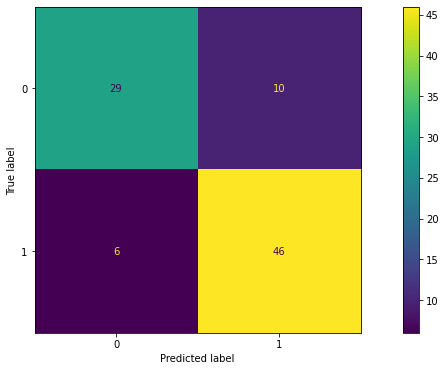

In [26]:
# Estimating best hyperparameter through gridsearch, using all the data available
SVM_best = GridSearchCV(estimator=SVM_model, param_grid=SVM_parameters, cv=inner_cv_parameters)
SVM_best.fit(x_in, y_out)

# Creating model with best parameters and training with train data
SVM_final = svm.SVC(**SVM_best.best_params_)
SVM_final.fit(x_train, y_train)

# Finding and storing model performance & confusion matrix results
tn, fp, fn, tp = skl.metrics.confusion_matrix(y_val, SVM_final.predict(x_val)).ravel()
summary_model_performance['SVM'] = {'mscore': SVM_cv_outer_block.mean(), 'tcorrect': tn+tp, 'fpositives': fp, 'fnegatives': fn}

# Getting confusion matrix on validation data
skl.metrics.plot_confusion_matrix(SVM_final, x_val, y_val)
print('SVM best parameter: %s, best score: %.2f%% '%(SVM_best.best_params_, 100*SVM_best.best_score_))

In this case, for the SVM, the number of positives and negatives correctly identify 46 from 29. The number of false negatives and false positives is 6 and 10 respectively.

Until this point the support vector machine is the best model.

### k-Nearest Neighbors Classifier

The KNN model is a non-parametric supervised learning method that save a number of the training examples and their categories to classify new data based on a similarity measurement for each of the classes.

The KNN model was implemented using [k-Nearest neighbors classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) from `sklearn`. Also, a grid was created to explore different hyperparameters such as:

* Metric: Function implemented to calculate the distance between a class an a new input
* n_neighbors: Number of k nearest neighbors
* Weights: The weight function used in prediction

In [15]:
# Parameter Establishment
KNN_parameters = {'metric': ['minkowski', 'euclidean', 'manhattan', 'chebyshev'],
            'n_neighbors': [5, 10, 20, 30],
            'weights': ['uniform', 'distance']}

# Initializing Model
KNN_model = KNeighborsClassifier()

# # Inner Block
# KNN_cv_inner_block = GridSearchCV(estimator=KNN_model, param_grid=KNN_parameters,
#     cv=inner_cv_parameters, scoring= evaluation_metric)

# # Outer Block
# KNN_cv_outer_block = cross_val_score(KNN_cv_inner_block,
#     x_in, y_out, cv=outer_cv_parameters, scoring=evaluation_metric)

# # Model score in outer block
# print('KNeighbors Classifier Outer Average f1 score: %.4f, standard deviation of %0.2f'
#       %(KNN_cv_outer_block.mean(), KNN_cv_outer_block.std()))

# # Storage of model performance
# summary_model_performance['KNN'] = KNN_cv_outer_block.mean()

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


KNeighbors Classifier Outer Average f1 score: 0.4567, standard deviation of 0.32


#### KNN Confusion Matrix
In order to check the results of the model not just in terms of the f1 score, the confusion matrix was also performed:

KNN best parameter: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}, best score: 56.35% 


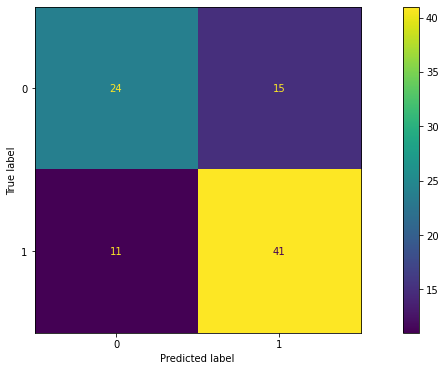

In [16]:
# Estimating best hyperparameter through gridsearch, using all the data available
KNN_best = GridSearchCV(estimator=KNN_model, param_grid=KNN_parameters, cv=inner_cv_parameters)
KNN_best.fit(x_in, y_out)

# Creating model with best parameters and training with train data
KNN_final = KNeighborsClassifier(**KNN_best.best_params_)
KNN_final.fit(x_train, y_train)

# Finding and storing model performance & confusion matrix results
tn, fp, fn, tp = skl.metrics.confusion_matrix(y_val, KNN_final.predict(x_val)).ravel()
summary_model_performance['KNN'] = {'mscore': KNN_cv_outer_block.mean(), 'tcorrect': tn+tp, 'fpositives': fp, 'fnegatives': fn}

# Getting confusion matrix on validation data
skl.metrics.plot_confusion_matrix(KNN_final, x_val, y_val)
print('KNN best parameter: %s, best score: %.2f%% '%(KNN_best.best_params_, 100*KNN_best.best_score_))

For the KNN, the total number of correct predictions was around 65. The number of false positives and false negatives is 15 and 11 respectively.

### Logistic Regression Classifier
In a simple explanation, this is a supervised learning model that maps inputs into outputs through a logistic function. This model was implemented through the function [linear_model.LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) from `sklearn`. The grid for different hyperparameters considers:

* C: The nverse of regularization strength
* solver: This specifies different algorithms used for optimization
* max_iter: maximum number of iterations

In [17]:
# Parameter Establishment
LR_parameters = {'C': [1e-5, 1e-2, 1, 1e2, 1e5],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],
           'max_iter': [50000]}

# Initializing Model
LR_model = linear_model.LogisticRegression()

# # Inner Block
# LR_cv_inner_block = GridSearchCV(estimator=LR_model, param_grid=LR_parameters,
#     cv=inner_cv_parameters, scoring= evaluation_metric)

# # Outer Block
# LR_cv_outer_block = cross_val_score(LR_cv_inner_block,
#     x_in, y_out, cv=outer_cv_parameters, scoring=evaluation_metric)

# # Model score in outer block
# print('Logistic Regression Outer Average f1 score: %.4f, standard deviation of %0.2f'
#       %(LR_cv_outer_block.mean(), LR_cv_outer_block.std()))

# # Storage of model performance
# summary_model_performance['LR'] = LR_cv_outer_block.mean()

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1376, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  FitFailedWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kevin\Anaconda3\lib\site-packages\skle

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1376, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  FitFailedWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarnin

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1376, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  FitFailedWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kevin\Anaconda3\lib\site-packages\skle

Logistic Regression Outer Average f1 score: 0.5346, standard deviation of 0.38


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:614: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1376, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  FitFailedWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:921: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan]
  category=UserWarning


#### LR Confusion Matrix
In order to check the results of the model not just in terms of the f1 score, the confusion matrix was also performed:

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did 

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LR best parameter: {'C': 1, 'max_iter': 1000, 'solver': 'liblinear'}, best score: 75.21% 


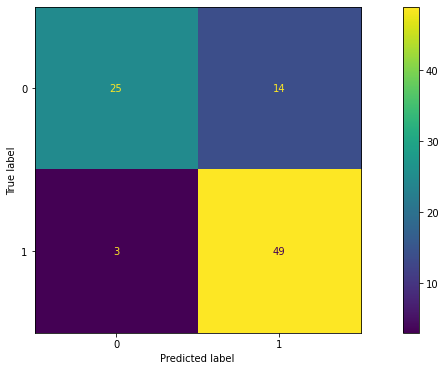

In [18]:
# Estimating best hyperparameter through gridsearch, using all the data available
LR_best = GridSearchCV(estimator=LR_model, param_grid=LR_parameters, cv=inner_cv_parameters)
LR_best.fit(x_in, y_out)

# Creating model with best parameters and training with train data
LR_final = linear_model.LogisticRegression(**LR_best.best_params_)
LR_final.fit(x_train, y_train)

# Finding and storing model performance & confusion matrix results
tn, fp, fn, tp = skl.metrics.confusion_matrix(y_val, LR_final.predict(x_val)).ravel()
summary_model_performance['LR'] = {'mscore': LR_cv_outer_block.mean(), 'tcorrect': tn+tp, 'fpositives': fp, 'fnegatives': fn}

# Getting confusion matrix on validation data
skl.metrics.plot_confusion_matrix(LR_final, x_val, y_val)
print('LR best parameter: %s, best score: %.2f%% '%(LR_best.best_params_, 100*LR_best.best_score_))

For the LR model, the total amount of correctly identified was 74. The number of false positives and false negatives is 14 and 3 respectively.

### Multilayer Perceptron

This model is normally described as a feedforward artificial neural network that uses supervised learning to perform a mapping between inputs and outputs. It has been named as a universal function approximation.

This model was implemented through the function [neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) from `sklearn`. The grid for different hyperparameters considers:

* hidden_layer_sizes: The number hidden layers & neurons in each hidden layer
* activation: Activation function for every neuron
* solver: Optimization algorithm


In [43]:
# Parameter Establishment
MLP_parameters = {'hidden_layer_sizes': [(30, 20, 10, 5), (50, 10, 2), (100, 20, 5)],
            'activation': ['tanh', 'relu'],
            'solver': ['lbfgs', 'adam'],
            'learning_rate_init': [0.01, 0.001],
            'early_stopping': [True],
            'n_iter_no_change': [4],
            'max_iter': [50000]}

# Initializing Model
MLP_model = MLPClassifier()

# # Inner Block
# MLP_cv_inner_block = GridSearchCV(estimator=MLP_model, param_grid=MLP_parameters,
#     cv=inner_cv_parameters, scoring= evaluation_metric)

# # Outer Block
# MLP_cv_outer_block = cross_val_score(MLP_cv_inner_block,
#     x_in, y_out, cv=outer_cv_parameters, scoring=evaluation_metric)

# # Model score in outer block
# print('Multi Layer Perceptron Outer Average f1 score: %.4f, standard deviation of %0.2f'
#       %(MLP_cv_outer_block.mean(), MLP_cv_outer_block.std()))

# # Storage of model performance
# summary_model_performance['MLP'] = MLP_cv_outer_block.mean()

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predi

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data 

Multi Layer Perceptron Outer Average f1 score: 0.3572, standard deviation of 0.34


#### MLP Confusion Matrix
The confusion matrix of the MLP showed us how this model is also better than the others at having less false positives and false negatives

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

MLP best parameter: {'activation': 'tanh', 'early_stopping': True, 'hidden_layer_sizes': (50, 10, 2), 'learning_rate_init': 0.01, 'max_iter': 50000, 'n_iter_no_change': 4, 'solver': 'lbfgs'}, best score: 69.92% 


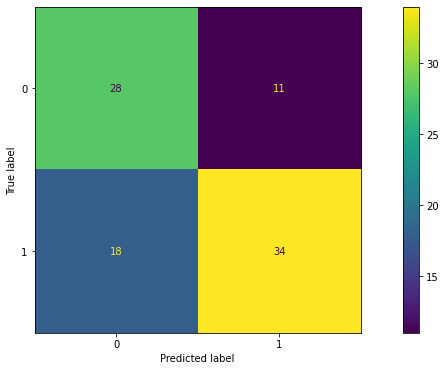

In [44]:
# Estimating best hyperparameter through gridsearch, using all the data available
model_parameter_selection = GridSearchCV(estimator=MLP_model, param_grid=MLP_parameters, cv=inner_cv_parameters)
model_parameter_selection.fit(x_in, y_out)

# Creating model with best parameters and training with train data
MLP_final = MLPClassifier(**model_parameter_selection.best_params_)
MLP_final.fit(x_train,y_train)

# Finding and storing model performance & confusion matrix results
tn, fp, fn, tp = skl.metrics.confusion_matrix(y_val, MLP_final.predict(x_val)).ravel()
summary_model_performance['MLP'] = {'mscore': MLP_cv_outer_block.mean(), 'tcorrect': tn+tp, 'fpositives': fp, 'fnegatives': fn}

# Getting confusion matrix on validation data
skl.metrics.plot_confusion_matrix(MLP_final, x_val, y_val)
print('MLP best parameter: %s, best score: %.2f%% '%(model_parameter_selection.best_params_, 100*model_parameter_selection.best_score_))

### Selecting the Best Model
Based on the results given through the f1-score using `sklearn` framework, the best model is the **Multi-Layer Perceptron** with a f1 score of around **94.8%**.

Text(0.5, 0, 'f1 score')

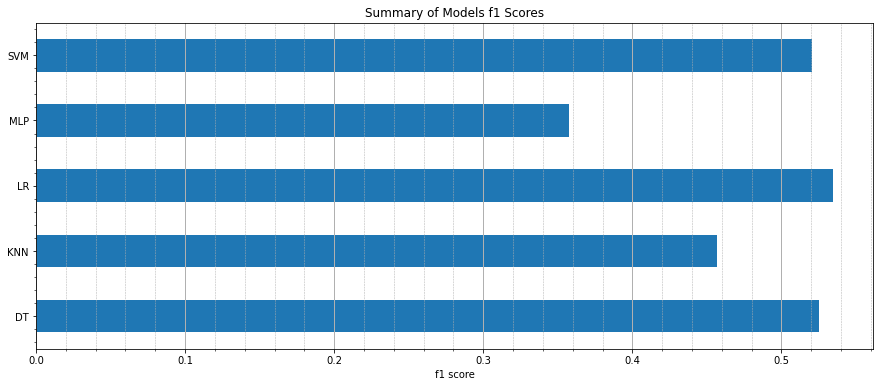

In [45]:
df = pd.DataFrame(summary_model_performance)

fig, ax = plt.subplots()
ax = df.iloc[0].transpose().plot(kind='barh')
ax.minorticks_on()
ax.grid(which='major',linestyle='-', linewidth=1, axis='x', zorder=0)
ax.grid(which='minor',linestyle='--', linewidth=0.5, axis='x', zorder=0)
ax.set_title('Summary of Models f1 Scores')
ax.set_xlabel('f1 score')

The MLP is the model that predicts the largest number of classes correctly.

Text(0.5, 0, 'Total Correctly Predicted')

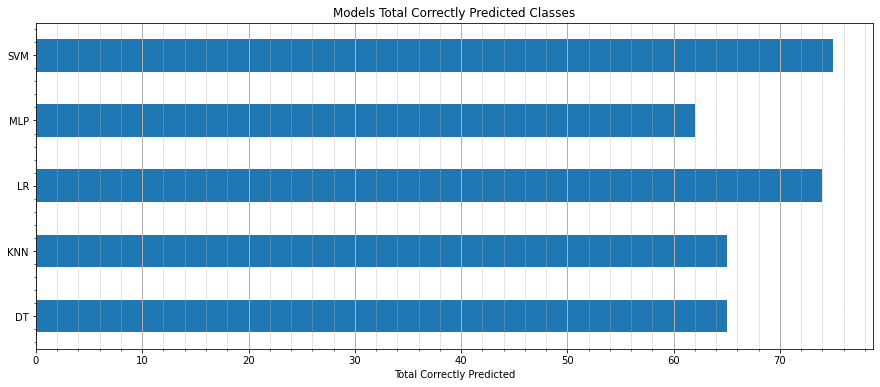

In [46]:
fig, ax = plt.subplots()
ax = df.iloc[1].transpose().plot(kind='barh')
ax.minorticks_on()
ax.grid(which='major',linestyle='-', linewidth=1, axis='x', zorder=0)
ax.grid(which='minor',linestyle='--', linewidth=0.5, axis='x', zorder=0)
ax.set_title('Models Total Correctly Predicted Classes')
ax.set_xlabel('Total Correctly Predicted')

We can verify this also by checking the number of false positives and false negatives which in this case we would like to be the least possible number

Text(0.5, 0, 'Number of False Positives & False Negatives')

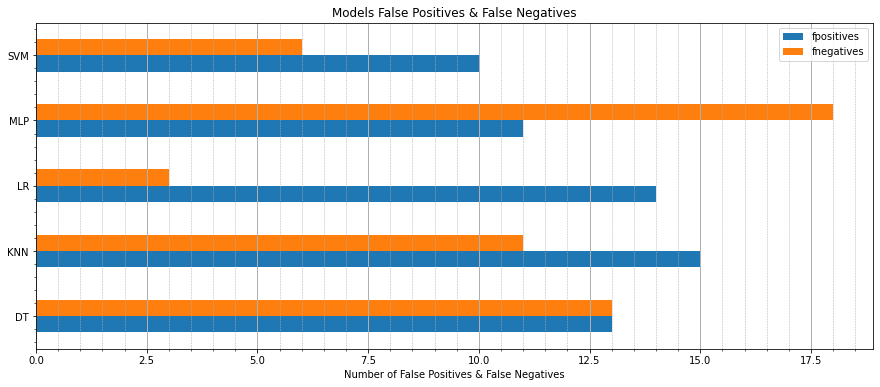

In [47]:
ax = df.iloc[2:].transpose().plot(kind='barh')
ax.minorticks_on()
ax.grid(which='major',linestyle='-', linewidth=1, axis='x', zorder=0)
ax.grid(which='minor',linestyle='--', linewidth=0.5, axis='x', zorder=0)
ax.set_title('Models False Positives & False Negatives')
ax.set_xlabel('Number of False Positives & False Negatives')

After having verified the superiority of our chosen model, this is also ready for production and get new predictions

In [48]:
# Defining training folds
cv_ = KFold(n_splits=5)
# Evaluation Metric
evaluation_metric = 'f1'
# Initializing the model
MLP_model = MLPClassifier()
# Parameter Establishment
MLP_parameters = {'hidden_layer_sizes': [(30, 20, 10, 5), (30, 15, 5), (30, 15)],
            'activation': ['tanh', 'relu'],
            'solver': ['lbfgs', 'adam'],
            'learning_rate_init': [0.01, 0.001],
            'early_stopping': [True],
            'n_iter_no_change': [6],
            'max_iter': [20000]}

In [49]:
model_parameter_finder = GridSearchCV(estimator=MLP_model, param_grid= MLP_parameters, cv=cv_)
model_parameter_finder.fit(x_train,y_train)
# Creating model with best parameters and training with train data
MLP_final = MLPClassifier(**model_parameter_finder.best_params_)
MLP_final.fit(x_train,y_train)

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

MLPClassifier(early_stopping=True, hidden_layer_sizes=(30, 20, 10, 5),
              learning_rate_init=0.01, max_iter=20000, n_iter_no_change=6,
              solver='lbfgs')

In [ ]:
# Getting confusion matrix on validation data
skl.metrics.plot_confusion_matrix(MLP_final, x_val, y_val)
print('MLP best parameter: %s, best score: %.2f%% '%(model_parameter_finder.best_params_, 100*model_parameter_finder.best_score_))

In [ ]:
prediction = MLP_final.predict(x_val)
print(classification_report(y_val, prediction))

## Saving the model

In [ ]:
pkl_filename = 'pickle_MLP_model'
with open(pkl_filename, 'wb') as file:
    pickle.dump(MLP_final, file)

In [ ]:
prediction = MLP_final.predict(x_val)
print(classification_report(y_val, prediction))

## Saving the model

In [ ]:
pkl_filename = 'pickle_MLP_model'
with open(pkl_filename, 'wb') as file:
    pickle.dump(MLP_final, file)

## Loading the Model

In [ ]:
with open(pkl_filename, 'rb') as file:
    pickle_model=pickle.load(file)

print(pickle_model)

## Testing the loaded model

MLP best parameter: {'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': (30, 20, 10, 5), 'learning_rate_init': 0.01, 'max_iter': 20000, 'n_iter_no_change': 6, 'solver': 'lbfgs'}, best score: 80.20% 


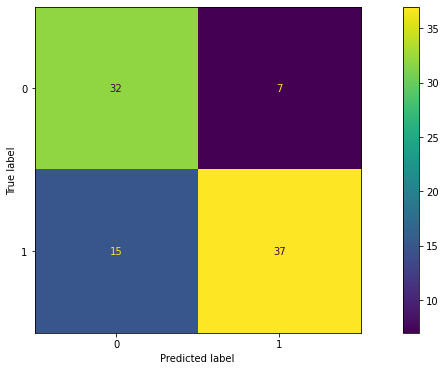

In [50]:
score = pickle_model.score(x_val, y_val)
print('Test score: {0:.2f}%'.format(100*score))

pickle_model.predict(x_val)

In [51]:
prediction = MLP_final.predict(x_val)
print(classification_report(y_val, prediction))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74        39
           1       0.84      0.71      0.77        52

    accuracy                           0.76        91
   macro avg       0.76      0.77      0.76        91
weighted avg       0.77      0.76      0.76        91



## Saving the model

In [ ]:
pkl_filename = 'pickle_MLP_model'
with open(pkl_filename, 'wb') as file:
    pickle.dump(MLP_final, file)

## Loading the Model

In [ ]:
with open(pkl_filename, 'rb') as file:
    pickle_model=pickle.load(file)

print(pickle_model)

## Testing the loaded model

In [ ]:
score = pickle_model.score(x_val, y_val)
print('Test score: {0:.2f}%'.format(100*score))

pickle_model.predict(x_val)